<a href="https://colab.research.google.com/github/klysman08/Machine-Learning/blob/master/Previs%C3%A3o_de_invent%C3%A1rio_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
0# Módulos utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# Leitura dos arquivos, preenchendo valores faltantes com -1
train = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/train.csv', index_col='sku').fillna(-1)
test = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/test.csv', index_col='sku').fillna(-1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Separação de atributos de entrada (X) e saída (y)
X_train, y_train = train.drop('isBackorder', axis=1), train['isBackorder']

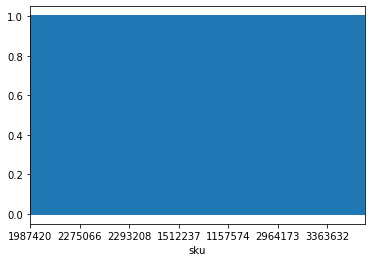

In [28]:
y_train.plot()

In [10]:
X_train.values

array([[  5.,   2.,   0., ...,   0.,   1.,   0.],
       [ 17.,   8.,   0., ...,   0.,   1.,   0.],
       [ 11.,  10.,   0., ...,   0.,   1.,   0.],
       ...,
       [ 26.,  -1.,   0., ...,   1.,   0.,   0.],
       [  5.,  -1.,   0., ...,   0.,   1.,   0.],
       [148.,   9.,   0., ...,   0.,   1.,   0.]])

In [12]:

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train.values)  


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[0.58545493 0.38604383 0.02250401 0.00363459]
[34483924.52916998 28001948.96878016  6760828.40568139  2717051.33014926]


In [0]:
plt.bar(X_train_pca)

In [0]:
X_train_pca = pd.DataFrame(pca.transform(X_train))


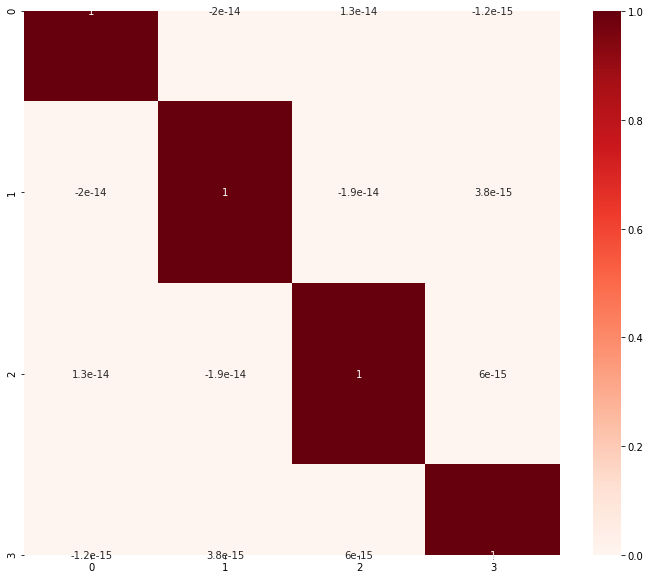

In [18]:
plt.figure(figsize=(12,10))
cor = X_train_pca.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
X_train_pca.columns

RangeIndex(start=0, stop=4, step=1)

In [29]:
# Ajuste do modelo
from sklearn.ensemble import RandomForestClassifier
#model = MLPClassifier(hidden_layer_sizes=(30,20,20), activation='relu',alpha=0.01, learning_rate='adaptive', solver='adam', random_state=42, max_iter=20, shuffle=True, verbose=True,)
model = RandomForestClassifier(n_estimators=30, random_state=64)
model.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=64, verbose=0,
                       warm_start=False)

In [0]:
test_pca = pd.DataFrame(pca.transform(test))

In [0]:
# Predição da probabilidade de falta (y) para novos valores
y_pred = model.predict_proba(test_pca)[:,1]

In [0]:
# Cria e salva arquivo para submissão
test['isBackorder'] = y_pred
pred = test['isBackorder'].reset_index()
pred.to_csv('submissionPCA.csv',index=False)